In [45]:
!pip install plotly

In [49]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/SciEcon/SRS2023_LLMs-BlockchainGovernance/main/data/Queried_Data/Discord%20-%20Uniswap%20-%20Governance.csv')

In [39]:
data

,AuthorID,Author,Date,Content,Attachments,Reactions
0,274208745699934220,callil_,09/17/2020 9:52 AM,Welcome to the governance channel! This channe...,NaN,🦄 (6)
1,274208745699934220,callil_,09/17/2020 9:52 AM,Pinned a message.,NaN,NaN
2,171049984060424193,chevispreston,09/17/2020 10:25 AM,This is the channel to be in :smug:,NaN,😎 (2)
3,394328926966775820,spritemoney,09/17/2020 10:28 AM,Make your token Liquidity locked!!,NaN,NaN
4,171049984060424193,chevispreston,09/17/2020 10:29 AM,"Waiting for all of the ""pls incentivize sushis...",NaN,😆 (1)
...,...,...,...,...,...,...
11544,471357824299958273,crypto_rachel,06/24/2023 2:34 AM,follow my reply above,NaN,NaN
11545,794923489379352576,vageta#9218,06/25/2023 10:39 PM,Does this project need any experienced chat ad...,NaN,NaN
11546,1034867078588543046,0xroboed,06/28/2023 3:05 AM,In September 2022 the governance voted in favo...,NaN,NaN
11547,471357824299958273,crypto_rachel,06/28/2023 3:06 AM,The ZKsync team is responsible for the launchi...,NaN,NaN


In [40]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [41]:
data

,AuthorID,Author,Date,Content,Attachments,Reactions
0,274208745699934220,callil_,2020-09-17 09:52:00,Welcome to the governance channel! This channe...,NaN,🦄 (6)
1,274208745699934220,callil_,2020-09-17 09:52:00,Pinned a message.,NaN,NaN
2,171049984060424193,chevispreston,2020-09-17 10:25:00,This is the channel to be in :smug:,NaN,😎 (2)
3,394328926966775820,spritemoney,2020-09-17 10:28:00,Make your token Liquidity locked!!,NaN,NaN
4,171049984060424193,chevispreston,2020-09-17 10:29:00,"Waiting for all of the ""pls incentivize sushis...",NaN,😆 (1)
...,...,...,...,...,...,...
11544,471357824299958273,crypto_rachel,2023-06-24 02:34:00,follow my reply above,NaN,NaN
11545,794923489379352576,vageta#9218,2023-06-25 22:39:00,Does this project need any experienced chat ad...,NaN,NaN
11546,1034867078588543046,0xroboed,2023-06-28 03:05:00,In September 2022 the governance voted in favo...,NaN,NaN
11547,471357824299958273,crypto_rachel,2023-06-28 03:06:00,The ZKsync team is responsible for the launchi...,NaN,NaN


In [51]:
daily_counts = data['Date'].value_counts().sort_index()

fig = go.Figure(data=go.Scatter(x=daily_counts.index, y=daily_counts.values))
fig.update_layout(title='Number of Discussions Over Time', xaxis_title='Date', yaxis_title='Number of Discussions')

fig.write_html("discussion_chart.html")

In [52]:
!pip install nltk wordcloud

In [60]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

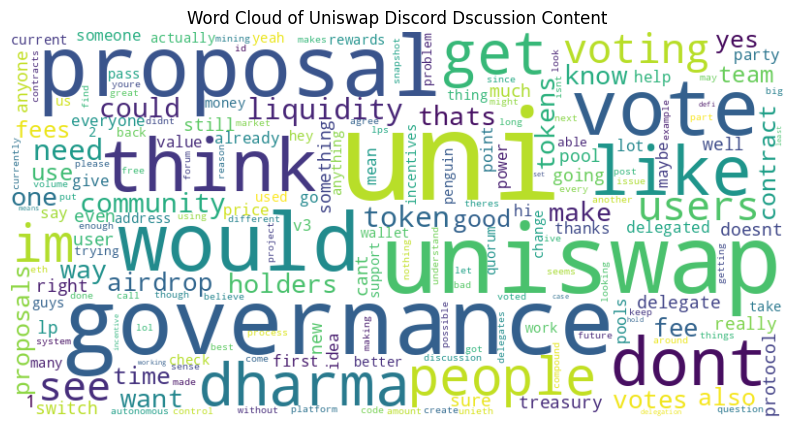

In [62]:
data = pd.read_csv("https://raw.githubusercontent.com/SciEcon/SRS2023_LLMs-BlockchainGovernance/main/data/Queried_Data/Discord%20-%20Uniswap%20-%20Governance.csv")

all_content = ' '.join(data['Content'].astype(str))

cleaned_content = re.sub(r'[^A-Za-z0-9 ]+', '', all_content.lower())

stop_words = set(stopwords.words('english'))
tokens = word_tokenize(cleaned_content)
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

freq_dist = nltk.FreqDist(filtered_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Uniswap Discord Dscussion Content')
plt.show()